## **09. Representasi Pengetahuan (Knowledge Representation)**

---


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_testing = pd.read_csv('hasil_prediksi(cnn).csv')

FileNotFoundError: [Errno 2] No such file or directory: 'hasil_prediksi(cnn).csv'

In [ ]:
#eda dari data_testing jumlah kosa kata dan kata terpanjang pada full_text
print(data_testing['full_text'].str.split().apply(len).describe())



count    1880.000000
mean       18.262766
std        11.283473
min         2.000000
25%        10.000000
50%        15.000000
75%        25.000000
max        54.000000
Name: full_text, dtype: float64


In [ ]:
#tampilkan atribut yang ada di data
data_testing.columns

Index(['username', 'full_text', 'topic', 'predicted_label',
       'probability_emotion'],
      dtype='object')

In [ ]:
#ubah nama atribut topic_cluster menjadi topic
data_testing.rename(columns={'topic_cluster':'topic'}, inplace=True)

#tambahkan atribut probability = 0
data_testing['probability'] = 0

#tambahkan atribut konteks dengan 0
data_testing['context'] = 0


In [ ]:
#tampilkan hanya kolom full_text, topic_cluster, emotion dan username
merged_df = data_testing[['username','full_text','topic', 'predicted_label', 'probability_emotion']]

merged_df.head(10)

,username,full_text,topic,predicted_label,probability_emotion
0,tigapuluhtigax,TIMNAS PRIA DAN WANITA MENANG + ERIK TEN HAG STAY,1,Love,0.356783
1,sotongism,ngerasa ga sih sekarang timnas kalo main pakek jersey putih tuh aura menangnya naik drastis beda sama dulu kalo main pakek jersey putih nih pesimis duluan #TimnasDay,3,Anger,0.398854
2,peanutkacang123,2 Sejarah Dicetak Timnas Indonesia Usai Ganyang Filipina STY Pelatih Pemecah Rekor. #TimNasDay https://t.co/nLxTrlEYx5.,3,Joy,0.429124
3,PKananku1927,@womensfootie_id Tinggal tmbah pemain diaspora bisa lah ini timnas putri bersaing di Asia,1,Anger,0.244084
4,kangsil2012,Timnas Indonesia Vs Timnas Filipina 2-0 Indonesia Lolos ke Putaran Ketiga Kuaifikasi Piala Dunia 2026 https://t.co/if6QFIOQdd #sepakbola #IndonesiaFilipina #kualifikasipialadunia #TimnasIndonesia #TimnasFilipina #pssi,2,Joy,0.595000
5,refnotrev,@amayzing__ @idextratime antara lu fomo timnas atau emang kaga ngerti sistem pot,8,Anger,0.241570
6,KimJongUncchhhh,@fahmiiiiii14 @idextratime Beliau ini literally mantan pemain timnas yg beneran orang bola. Lah yg duduk di vip malah artis2 ga jelas. Kesannya kek habis manis sepah dibuang njir,3,Sad,0.335323
7,joyszeamays,Ternyata jodohnya sama Indo-Philiphine bukan Indo-Irak. Bonus liat perjuangan timnas lolos ke putaran ketiga : ),2,Love,0.305790
8,DenSombedt,@StatsRawon Kyok e Malik Rivera ambek glison Costa soale Malik wes mari teko timnas Kari Poto ambk gwe vidio,3,Joy,0.377967
9,ilyasaihza_,Sareneng kitu timnas menang? Abi mah bodo amat,4,Sad,0.292859


In [ ]:
jumlah_nan = merged_df.isna().sum()

print(jumlah_nan)

username               0
full_text              0
topic                  0
predicted_label        0
probability_emotion    0
dtype: int64


In [ ]:
#count emotion
emotion_count = merged_df['predicted_label'].value_counts()
emotion_count

predicted_label
Joy        834
Anger      353
Love       318
Neutral    228
Sad        128
Fear        19
Name: count, dtype: int64

## Knowledge

### Per-Topic

In [ ]:
topic_cluster_counts = merged_df['topic'].value_counts().reset_index()
topic_cluster_counts

,topic,count
0,3,351
1,0,335
2,1,292
3,2,264
4,4,243
5,5,157
6,7,84
7,8,76
8,9,54
9,6,24


In [ ]:
#tampilkan jenis emosi paling tinggi per topik
topic_emotion = merged_df.groupby(['topic','predicted_label']).size().reset_index(name='counts')
topic_emotion = topic_emotion.sort_values(by='counts', ascending=False)

In [ ]:
topik_ke = 9

topic_cluster_0_df = merged_df[merged_df['topic'] == topik_ke]
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='predicted_label', ascending=True)

count_emotion = topic_cluster_0_df['predicted_label'].value_counts().reset_index()
count_emotion

,predicted_label,count
0,Anger,21
1,Joy,13
2,Love,10
3,Neutral,5
4,Sad,3
5,Fear,2


In [ ]:
#jumlah data yang ada di topic_cluster_0_df
print('jumlah data yang ada di topic_cluster_0_df = ', len(topic_cluster_0_df))

jumlah data yang ada di topic_cluster_0_df =  54


<Axes: xlabel='predicted_label', ylabel='count'>

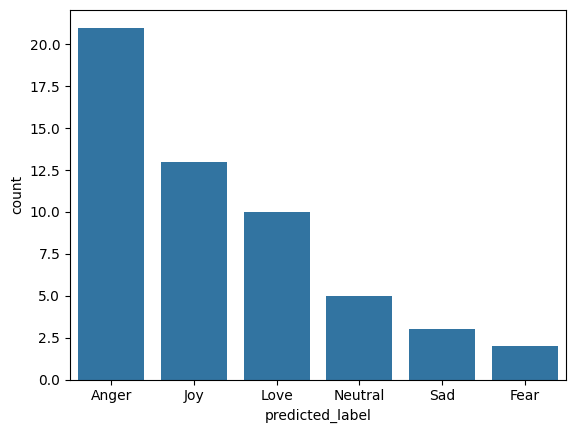

In [ ]:
sns.barplot(x='predicted_label', y='count', data=count_emotion)


In [ ]:
topic_cluster_0_df = topic_cluster_0_df.sort_values(by='predicted_label', ascending=False)


#tampilkan semuanya di output jangan dibatasi
pd.set_option('display.max_rows', None)
topic_cluster_0_df.head(10)


,username,full_text,topic,predicted_label,probability_emotion
820,melbbound,calvin verdonk ini gokil banget dia cepet adaptasi. hafal lagu indonesia raya sampe menitihkan air mata dan mainnya klop bangettt #TimnasDay https://t.co/4R6boJ6VIr,9,Sad,0.255952
996,mynameisrichie_,@vickotwitt @MDeva909 @DelanRamadoni22 @gilabola_ina Msh aja kotak kotakin pemain naturalisasi &amp; lokal. Toh mereka punya drh Indo dari keluarga. Bahkan rata-rata keluarga besar mrk masih tinggal Indonesia. Terserah Anda ga suka hak Anda balik aja sendiri ke jaman kegelapan Timnas. Gua sebagai anak La grande dukung yg skrng,9,Sad,0.282617
1279,ekbistangsel,Timnas Indonesia Ke Putaran Ketiga Kualifikasi Piala Dunia 2026 https://t.co/AyS3JH2NhG via @TentangKita.co,9,Sad,0.298106
814,celleyss,Pahamm kan netijen harus apaa Calvin Verdonk menunggu #TimnasDay https://t.co/aYYgGfv50a,9,Neutral,0.341139
863,selow_mas,Pakai Foto Rafael Struick dan Nathan Pedagang Aksesoris Banjir Cuan Jualan di GBK #TimNasDay https://t.co/ABxS5c2GqI,9,Neutral,0.393567
41,akankulepas,@muhfirda__ @idextratime @erickthohir Ian Maatsen bukannya dipanggil timnas Belanda ya? Gara gara De Jong dicoret,9,Neutral,0.285991
1489,UmarrrYoo,gimana indonesia mau maju kalau pejabatnya begini #timah #babel #kejagungarogan #kejagungoverbody #savebabel #timnasday #300t #ekonomibabel #tni #BUMN #Baktiuntuknegeri #kejagungri https://t.co/AfM3wxpwa6,9,Neutral,0.291190
1472,akabarfaisall,Info slot gacor hari ini Slot server thailand Garansi kekalahan 100% Situs deposit 10k Event scatter hitam LINK GACOR : https://t.co/DjDQZ0M9Q9 Towel Adrian Jay Idzes Nathan Syifa Verdonk Thailand #TimnasDay FIFA #SLOTPGWALLET #slottergacor #situsgacor https://t.co/rhnhO9RjpB,9,Neutral,0.277849
416,okezonenews,Timnas Indonesia Hantam Filipina 2-0 Shin Tae-yong Puas dengan Debut Calvin Verdonk https://t.co/Is41EPg8P0,9,Love,0.293711
1815,dhxx_w,Selain jago masak ternyata loopy jago main bola juga #TimNasDay #calvinverdonk #indonesiavsphilippines https://t.co/9WKXD6pGzA,9,Love,0.205608


In [ ]:
#ukuran kolom jangan dibatasi untuk full_text
pd.set_option('display.max_colwidth', None)

#tampilkan hanya emosi Joy
topic_cluster_0_df[topic_cluster_0_df['predicted_label'] == 'Fear'].head(200)

,username,full_text,topic,predicted_label,probability_emotion
1672,cingreborn,Kerasa sakitnya sampai disini prof haye ️ #timnasday https://t.co/kG918SdSY3,9,Fear,0.64241
1594,Ngdoantran1901,@codcng @Saeyaangh Gak usah pikir panjang aku pasti lepas ANGKOT88 takutnya malah jadi beban. #TimnasDay,9,Fear,0.44910


# Konten Tentang Timnas Indonesia di Vidio

## 1. Dukungan Penggemar untuk Timnas Indonesia (Joy)
**Konten Senang**: Video yang menyoroti dukungan penuh dari para penggemar untuk Timnas Indonesia, termasuk ucapan selamat dan sorak-sorai setelah kemenangan dalam berbagai pertandingan.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Timnas Indonesia! 🎉 Saksikan momen-momen kegembiraan dan ucapan selamat untuk para pemain. #DukungTimnas [link video]

## 2. Perjalanan Timnas Indonesia di Babak Kualifikasi Piala Dunia dan Piala Asia (Joy)
**Konten Senang**: Video rekapitulasi perjalanan Timnas Indonesia di babak kualifikasi, termasuk momen-momen penting dan wawancara dengan pemain serta pelatih.

**Contoh Tweet**:
> Timnas Indonesia tampil impresif di kualifikasi Piala Dunia dan Piala Asia! 🎉 Saksikan rekap perjalanan mereka dan wawancara eksklusif. #TimnasKualifikasi [link video]

## 3. Keberhasilan Timnas Indonesia Lolos ke Putaran Ketiga Kualifikasi Piala Dunia 2026 (Joy)
**Konten Senang**: Cuplikan video dari momen-momen gol dan selebrasi pemain serta fans. Kutipan inspiratif dari pelatih dan pemain tentang perjalanan mereka menuju kualifikasi.

**Contoh Tweet**:
> Timnas Indonesia lolos ke putaran ketiga kualifikasi Piala Dunia 2026! 🎊 Saksikan momen-momen terbaik dan kegembiraan para pemain dan fans! #TimnasLolos [link video]

## 4. Penampilan Anang Menyanyikan "Indonesia Pusaka" Sebelum Pertandingan (Anger)
**Konten Marah**: Video atau artikel yang membahas reaksi emosional penggemar terhadap penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan, dengan fokus pada kontroversi dan pendapat yang beragam.

**Contoh Tweet**:
> Penampilan Anang menyanyikan "Indonesia Pusaka" sebelum pertandingan menimbulkan berbagai reaksi. Apa pendapat kalian? #IndonesiaPusaka [link video]

## 5. Performa Thom Haye dan Verdonk di lapangan saat bersama timnas(Love)
**Konten Cinta**: Video reaksi penggemar yang menunjukkan dukungan dan kasih sayang mereka kepada pemain seperti Verdonk dan Haye. Testimoni dari fans tentang kecintaan mereka pada pemain dan tim.

**Contoh Tweet**:
> Dukungan luar biasa dari penggemar untuk Verdonk dan Haye! ❤️ Saksikan reaksi dan testimoni mereka tentang kecintaan pada Timnas Indonesia. #LoveForTimnas [link video]

## 6. Momen Bersejarah dan Gol Penting Timnas Indonesia (Joy)
**Konten Senang**: Cuplikan video dari momen-momen bersejarah dan gol-gol penting yang dicetak oleh Timnas Indonesia dalam babak kualifikasi dan turnamen AFF.

**Contoh Tweet**:
> Gol-gol bersejarah dari Timnas Indonesia di babak kualifikasi dan turnamen AFF! 🎊 Saksikan momen-momen terbaik di sini. #TimnasGol [link video]

## 7. Kondisi Rumput di Stadion Gelora Bung Karno Setelah Konser (Fear)
**Konten Takut**: Video yang menunjukkan kondisi rumput di Stadion Gelora Bung Karno setelah konser, dengan sorotan pada keluhan penggemar mengenai dampaknya pada performa timnas Indonesia di lapangan.

**Contoh Tweet**:
> Lihat kondisi rumput Stadion Gelora Bung Karno setelah konser dan bagaimana ini memengaruhi performa timnas Indonesia. #GBKRumput [link video]

## 8. Diskusi Strategi Pelatih Shin Tae-yong dan Potensi Pemain Diaspora (Joy)
**Konten Senang**: Video yang menyoroti strategi pelatih Shin Tae-yong dan performa pemain seperti Ernando dan Verdonk, termasuk diskusi tentang potensi pemain diaspora untuk memperkuat timnas.

**Contoh Tweet**:
> Lihat bagaimana strategi Shin Tae-yong membawa Timnas Indonesia ke puncak! 🎉 Diskusi tentang pemain diaspora dan potensi mereka di sini. 💪🇮🇩 [link video]

## 9. Kondisi Lapangan dan Performa Pemain di Berbagai Pertandingan (Fear)
**Konten Takut**: Video yang menunjukkan kondisi lapangan yang kurang baik dan dampaknya pada performa pemain Timnas Indonesia di berbagai pertandingan.

**Contoh Tweet**:
> Kondisi lapangan yang kurang baik memengaruhi performa pemain Timnas Indonesia. Lihat bagaimana ini berdampak pada pertandingan. #KondisiLapangan [link video]

## 10. Pengalaman Penggemar Menonton Pertandingan Timnas Indonesia (Fear)
**Konten Takut**: Video yang menunjukkan pengalaman penggemar saat menonton pertandingan timnas, dengan fokus pada momen-momen penting dan rasa takut akan ketinggalan (FOMO).

**Contoh Tweet**:
> Banyak yang merasa FOMO karena tidak bisa menonton langsung Timnas. 😢 Simak cerita mereka dan dukung Timnas dari rumah! #FOMOTimnas [link video]